___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### Load Dataset

In [6]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [7]:
df.head()

# cinsiyet-yas-yillik gelir-harcama puanlari

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.shape

(200, 5)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
new_column_names = {
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
}

df.rename(columns=new_column_names, inplace=True)
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.duplicated().sum()

0

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





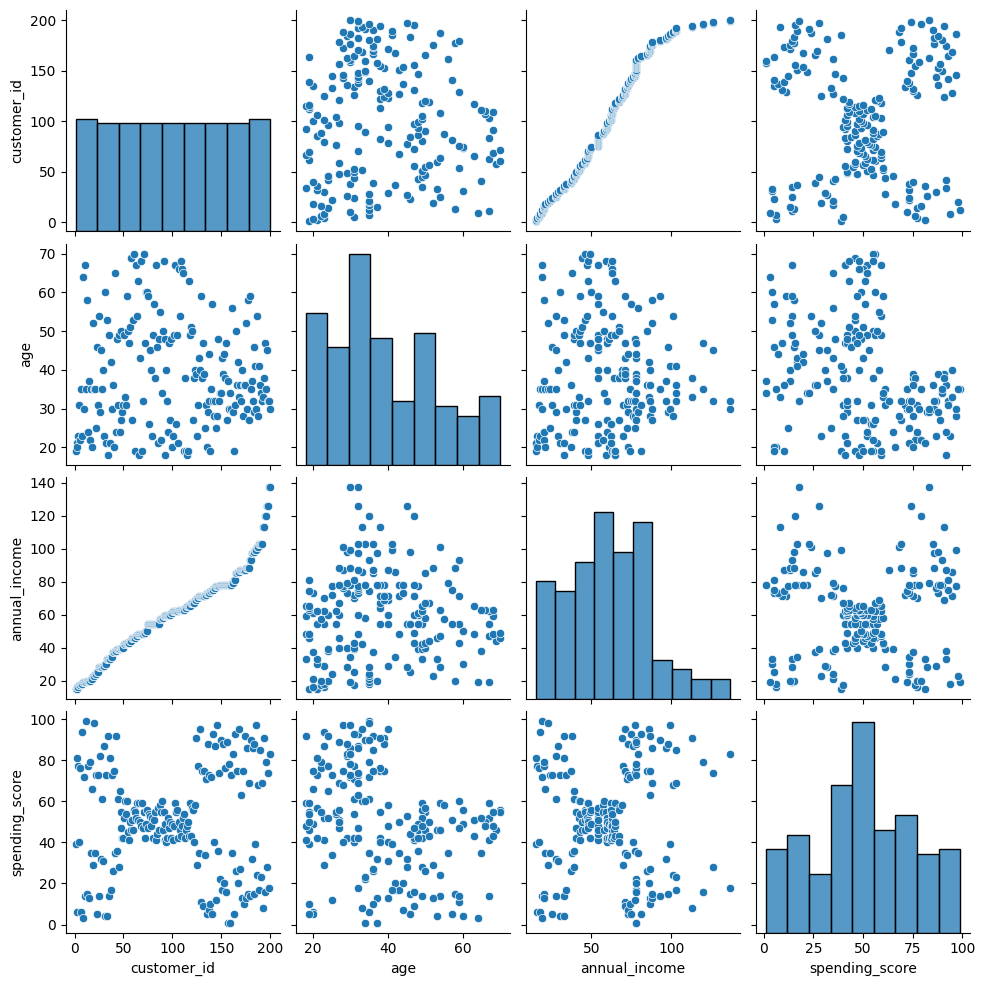

In [14]:
sns.pairplot(df);

<Axes: >

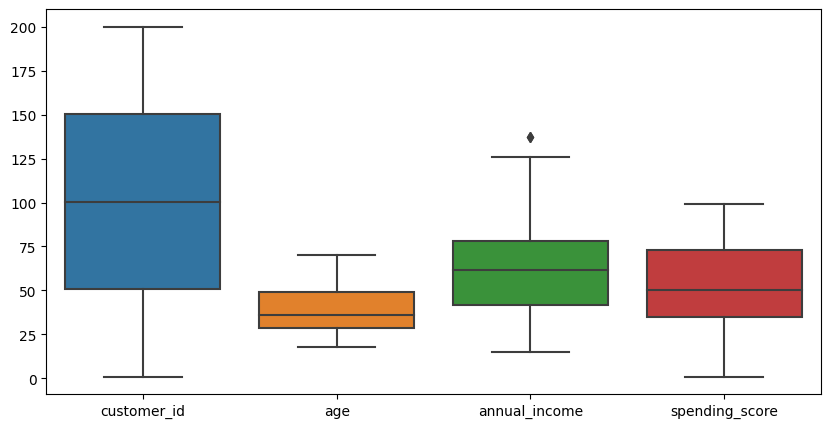

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

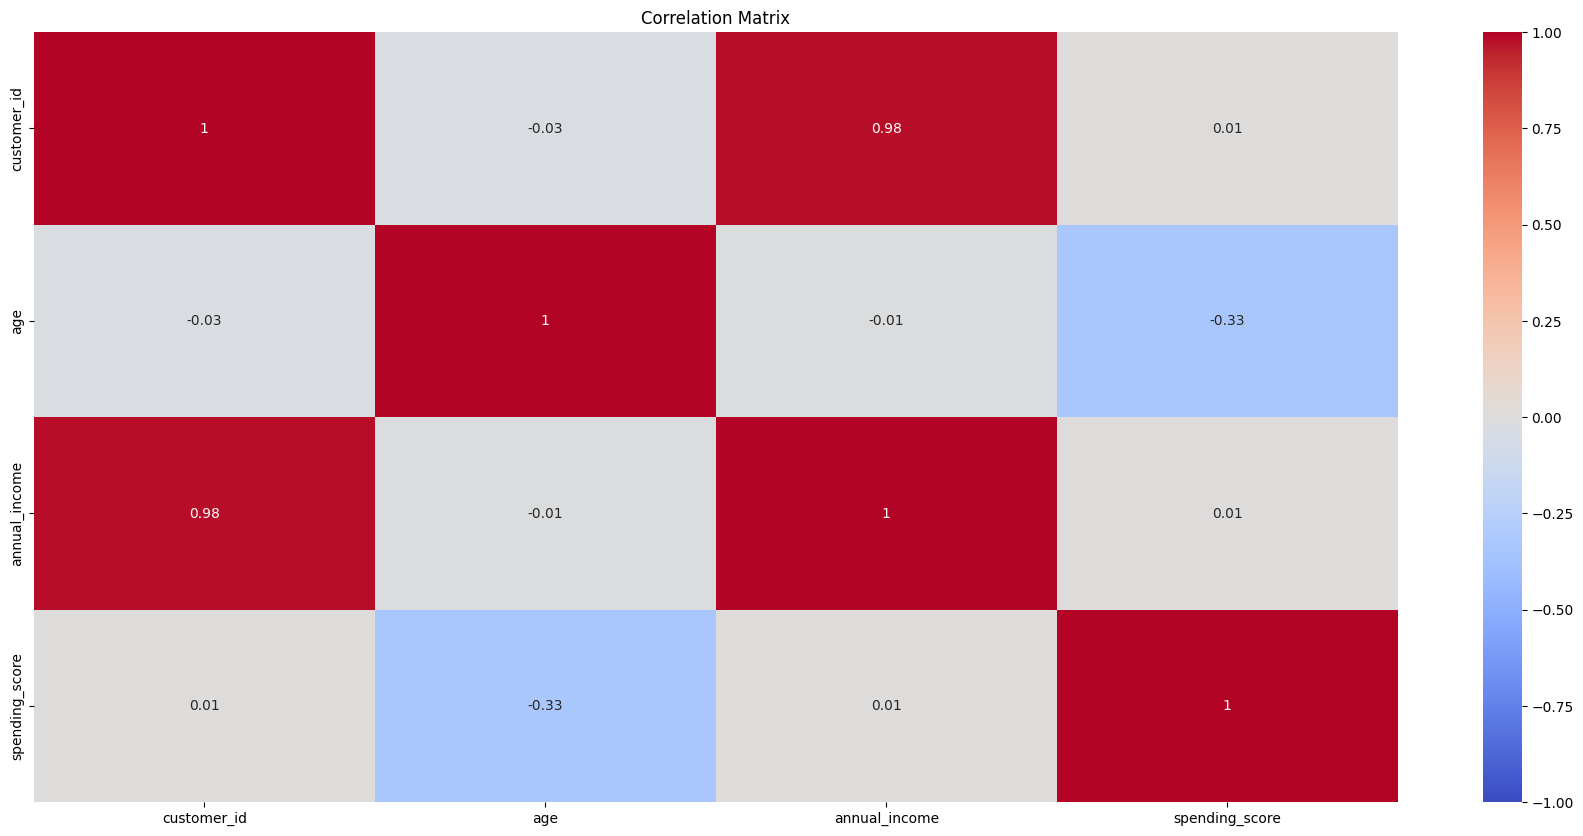

In [16]:
plt.figure(figsize=(22, 10))
sns.heatmap(df.corr().round(2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

plt.show()

In [17]:
df = df.drop(columns=['customer_id', 'gender'])

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

***
# K-MEANS ALGORITHM
***

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [19]:
X1 = df.drop(columns = ['annual_income'])
X1.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)

#### *ii. Determine optimal number of clusters*

## 1 - Clustering Tendency

### Hopkins Test

In [24]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [25]:
hopkins(X1_scaled, 0.05)

0.5789219898436163

## 2 - Optimal Number of Clusters

### Elbow Method

In [26]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X1_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

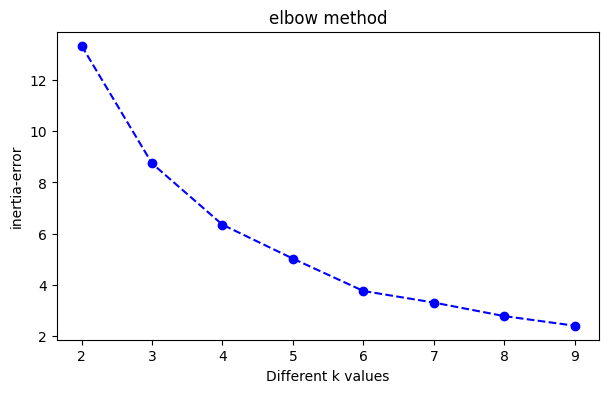

In [27]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [28]:
ssd

[13.337690580804235,
 8.742042168276537,
 6.3502463191224745,
 5.026143351352525,
 3.7627968093270683,
 3.3104461817381376,
 2.7815521203565936,
 2.406636281222873]

In [29]:
-pd.Series(ssd).diff()

0         NaN
1    4.595648
2    2.391796
3    1.324103
4    1.263347
5    0.452351
6    0.528894
7    0.374916
dtype: float64

In [30]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X1_scaled)
    distances = kmeanModel.transform(X1_scaled)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

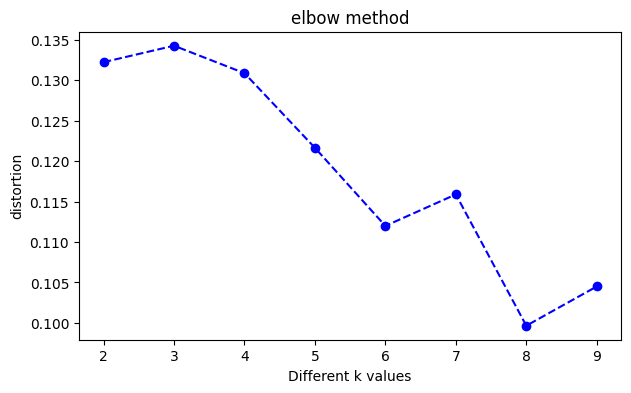

In [31]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")


## 3 - Clustering Quality

### Silhoutte Analysis

In [32]:
from sklearn.metrics import silhouette_score

In [36]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X1_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47252865228696783
For n_clusters=3, the silhouette score is 0.44058221683010546
For n_clusters=4, the silhouette score is 0.42882713071959183
For n_clusters=5, the silhouette score is 0.44625330587100703
For n_clusters=6, the silhouette score is 0.45615225386265235
For n_clusters=7, the silhouette score is 0.40578335793980236
For n_clusters=8, the silhouette score is 0.4169908111029726


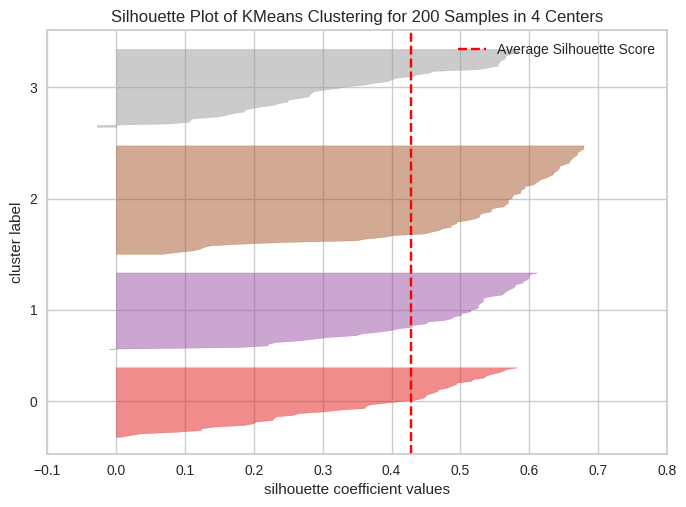

In [120]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4,
                random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X1_scaled)
visualizer.poof();

In [121]:
model4.labels_

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [122]:
for i in range(3):
    label = (model4.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.35429947673405393
mean silhouette score for label 1    : 0.46242685716507614
mean silhouette score for label 2    : 0.5179970803899694
mean silhouette score for all labels : 0.42882713071959183


#### *iii. Apply K Means*

In [123]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit_predict(X1_scaled)

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [124]:
model.labels_

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [125]:
clusters = model.labels_

In [126]:
X1.head()

,age,spending_score,clusters,predicted_clusters
0,19,39,4,0
1,21,81,0,3
2,20,6,1,0
3,23,77,0,3
4,31,40,4,0


In [127]:
X1["predicted_clusters"] = clusters

In [128]:
X1

,age,spending_score,clusters,predicted_clusters
0,19,39,4,0
1,21,81,0,2
2,20,6,1,0
3,23,77,0,2
4,31,40,4,0
5,22,76,0,2
6,35,6,1,3
7,23,94,0,2
8,64,3,5,3
9,30,72,0,2


#### *iv. Visualizing and Labeling All the Clusters*

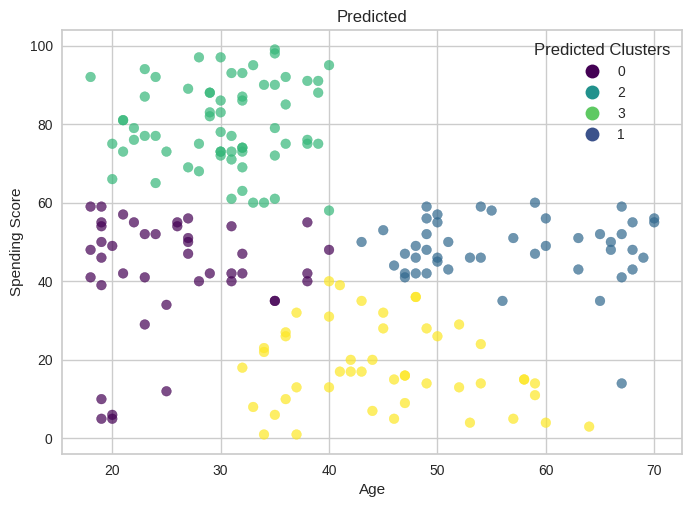

In [163]:
from matplotlib.lines import Line2D


plt.scatter(X1["age"],
            X1["spending_score"],
            c=X1.predicted_clusters,
            cmap="viridis",
            alpha=0.7)


# Extract unique cluster labels
unique_labels = X1.predicted_clusters.unique()

# Create legend handles and labels
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(label), markersize=10) for label in unique_labels]
labels = [str(label) for label in unique_labels]

# Add a legend with the cluster labels
plt.legend(handles, labels, title="Predicted Clusters")

# Add axis labels
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.title("Predicted")
plt.show()

In [136]:
X1.groupby('predicted_clusters')[['age', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('age', 'mean'), ascending=True)

age         spending_score        
                         mean min max           mean min max
predicted_clusters                                          
0                   25.500000  18  40      42.261905   5  59
2                   30.292308  18  40      79.815385  58  99
3                   45.276596  32  64      18.191489   1  40
1                   56.565217  43  70      48.304348  14  60

Interpreation (Labeling)

- 0 : Older medium spenders

- 1 : Mid-aged-to-older low spenders

- 2 : Young-to-mid-aged high spenders

- 3 : Younger low spenders

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [137]:
X2 = df.drop(columns = ['age'])
X2.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [138]:
scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)

#### *ii. Determine optimal number of clusters*

## 1 - Clustering Tendency

### Hopkins Test

In [139]:
hopkins(X2_scaled, 0.05)

0.6538186233499609

## 2 - Optimal Number of Clusters

### Elbow Method

In [140]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X2_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

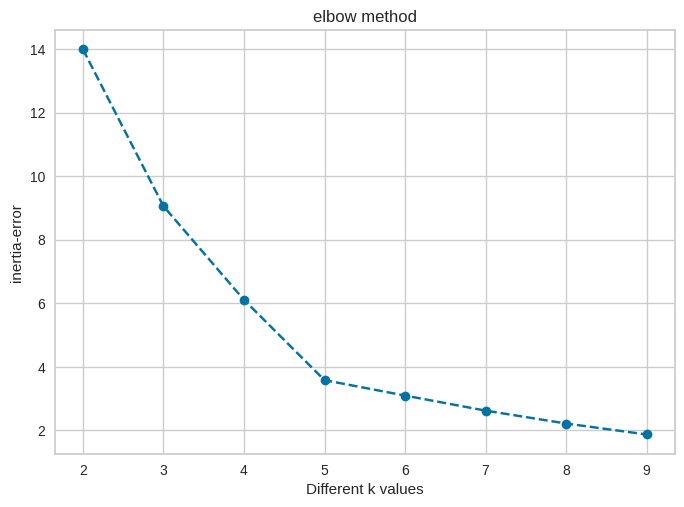

In [141]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [142]:
ssd

[13.993505283127973,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.098385141882586,
 2.624103948396722,
 2.218057312083072,
 1.873434667867071]

In [143]:
-pd.Series(ssd).diff()

0         NaN
1    4.934520
2    2.948673
3    2.527194
4    0.484733
5    0.474281
6    0.406047
7    0.344623
dtype: float64

In [144]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X2_scaled)
    distances = kmeanModel.transform(X2_scaled) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

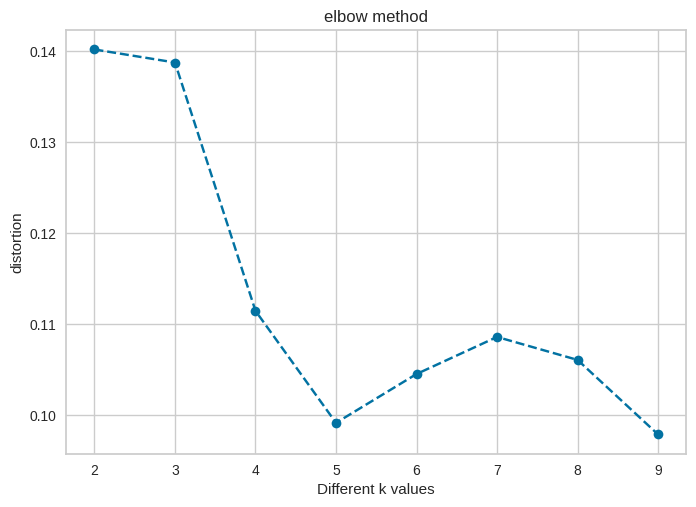

In [145]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

## 3 - Clustering Quality

### Silhoutte Analysis

In [146]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X2_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.33340205479521
For n_clusters=3, the silhouette score is 0.4514909309424474
For n_clusters=4, the silhouette score is 0.49620078745146784
For n_clusters=5, the silhouette score is 0.5594854531227246
For n_clusters=6, the silhouette score is 0.5377658512956012
For n_clusters=7, the silhouette score is 0.5187916611768829
For n_clusters=8, the silhouette score is 0.43038461857643606


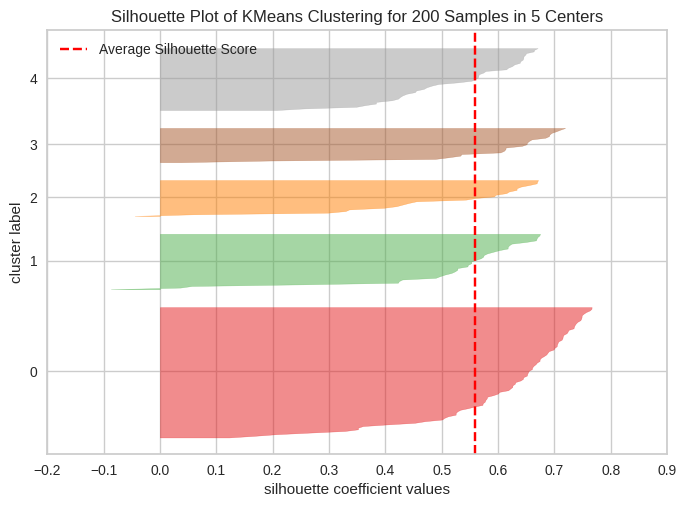

In [147]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5,
                random_state=42)          # we decided n_clusters=5!
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X2_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [148]:
model5.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [149]:
for i in range(5):
    label = (model5.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.6119010983052857
mean silhouette score for label 1    : 0.5100676264333632
mean silhouette score for label 2    : 0.4877449175242944
mean silhouette score for label 3    : 0.585932908834499
mean silhouette score for label 4    : 0.522360965108495
mean silhouette score for all labels : 0.5594854531227246


#### *iii. Apply K Means*

In [150]:
model = KMeans(n_clusters = 5, random_state=42)
model.fit_predict(X2_scaled)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [151]:
model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [152]:
clusters = model.labels_

In [153]:
X2["predicted_clusters"] = clusters

In [154]:
X2

,annual_income,spending_score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
5,17,76,3
6,18,6,2
7,18,94,3
8,19,3,2
9,19,72,3


#### *iv. Visualizing and Labeling All the Clusters*

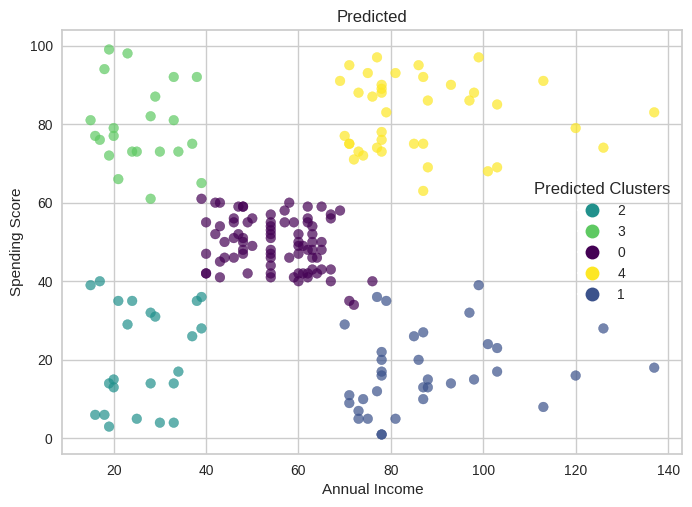

In [164]:
from matplotlib.lines import Line2D

plt.scatter(X2["annual_income"],
            X2["spending_score"],
            c=X2.predicted_clusters,
            cmap="viridis",
            alpha=0.7)


# Extract unique cluster labels
unique_labels = X2.predicted_clusters.unique()

# Create legend handles and labels
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(label), markersize=10) for label in unique_labels]
labels = [str(label) for label in unique_labels]

# Add a legend with the cluster labels
plt.legend(handles, labels, title="Predicted Clusters")

# Add axis labels
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.title("Predicted")
plt.show()

In [156]:
X2.groupby('predicted_clusters')[['annual_income', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('annual_income', 'mean'), ascending=True)

annual_income          spending_score        
                            mean min  max           mean min max
predicted_clusters                                              
3                      25.727273  15   39      79.363636  61  99
2                      26.304348  15   39      20.913043   3  40
0                      55.296296  39   76      49.518519  34  61
4                      86.538462  69  137      82.128205  63  97
1                      88.200000  70  137      17.114286   1  39

Interpretation (Labels)

0: Low annual income - High spending score

1: High annual income - Low spending score

2: High annual income - High spending score

3: Medium annual income - Medium spending score

4: Low annual income - Low spending score

***
## HIERARCHICAL CLUSTERING ALGORITHM
***

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [85]:
hc_ward = linkage(y=X1_scaled, method="ward")
hc_complete = linkage(X1_scaled, "complete")
hc_average = linkage(X1_scaled, "average")
hc_single = linkage(X1_scaled, "single")

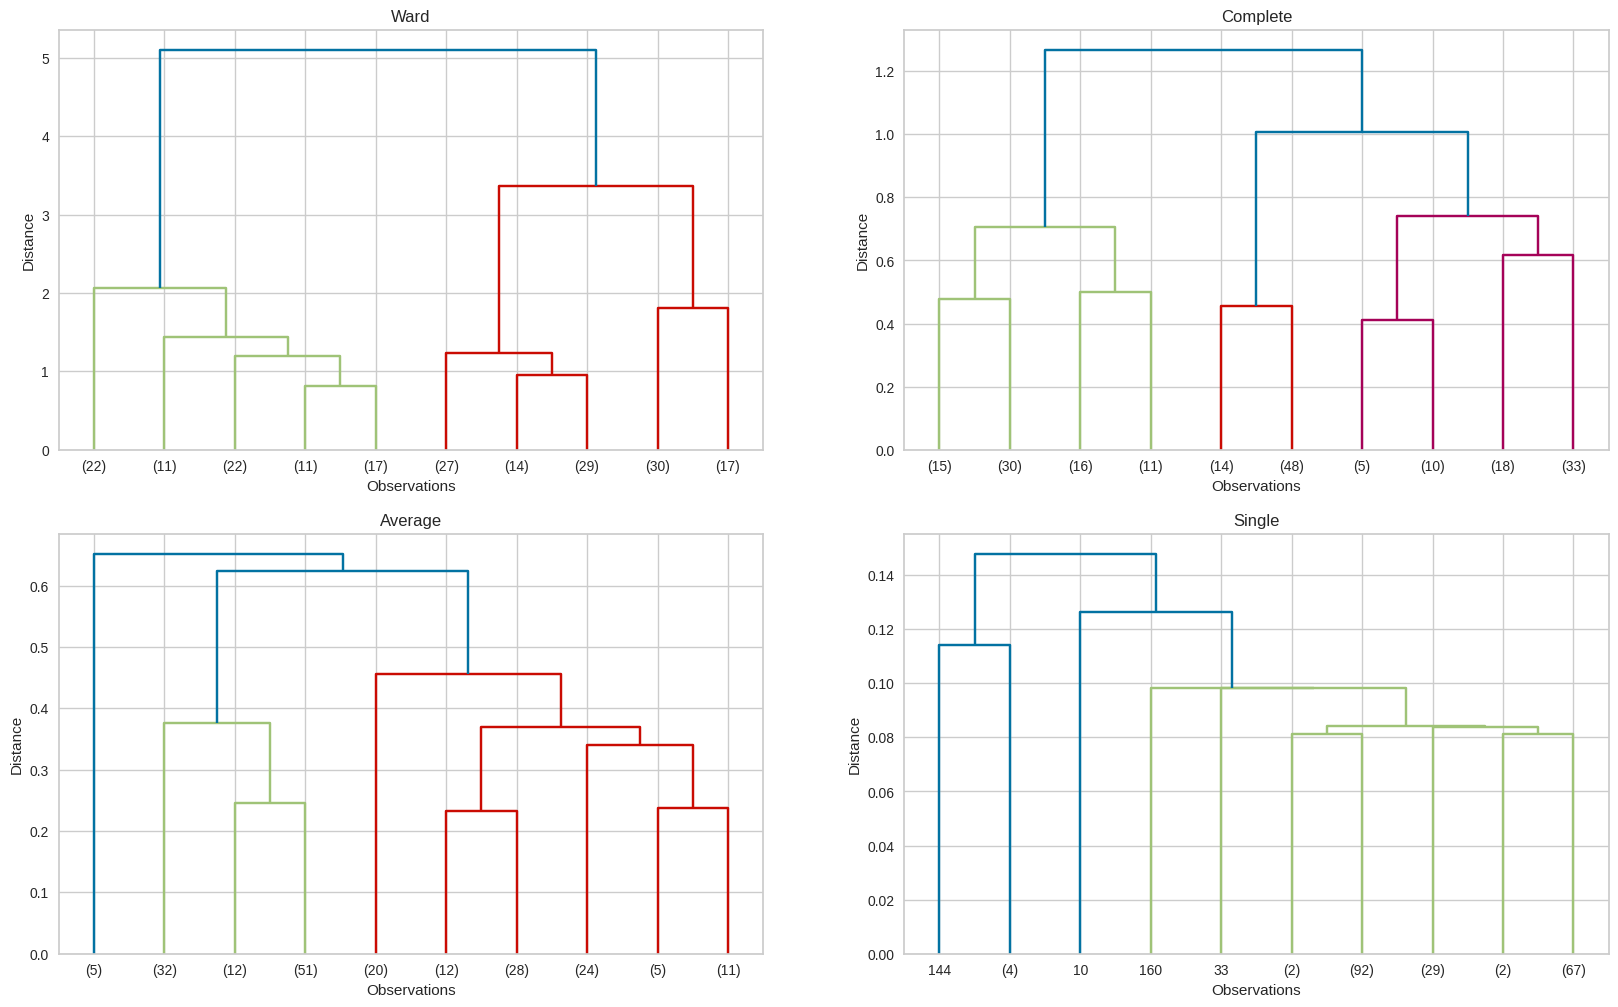

In [86]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

In [87]:
from sklearn.cluster import AgglomerativeClustering

In [88]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X1_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.41699937625242867
Silhouette Score for 3 clusters: 0.417124576652748
Silhouette Score for 4 clusters: 0.3898644314748176
Silhouette Score for 5 clusters: 0.37668241046330797
Silhouette Score for 6 clusters: 0.39920932010291066
Silhouette Score for 7 clusters: 0.3589298217276204
Silhouette Score for 8 clusters: 0.3611306861915168
Silhouette Score for 9 clusters: 0.3657953810746083


## Clustering based on Annual Income and Spending Score- x2

In [89]:
hc_ward = linkage(y=X2_scaled, method="ward")
hc_complete = linkage(X2_scaled, "complete")
hc_average = linkage(X2_scaled, "average")
hc_single = linkage(X2_scaled, "single")

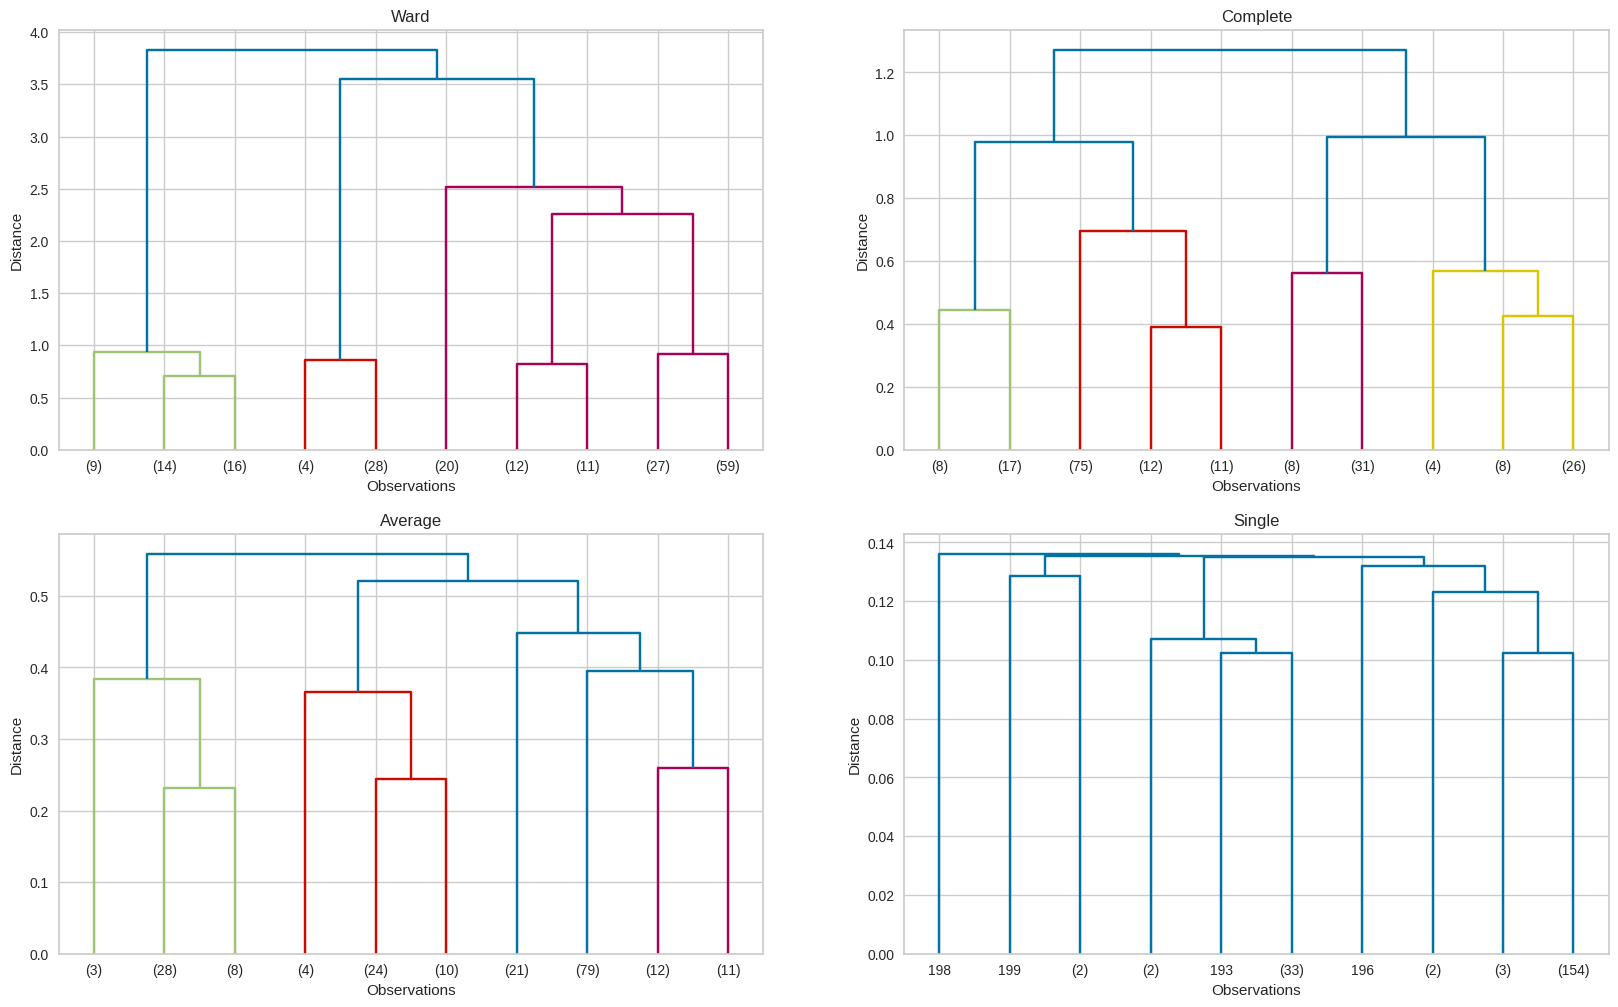

In [90]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

In [91]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X2_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.20050932290470005
Silhouette Score for 3 clusters: 0.09748244339847081
Silhouette Score for 4 clusters: 0.09968915553706402
Silhouette Score for 5 clusters: 0.07926762641458081
Silhouette Score for 6 clusters: 0.009742937391517558
Silhouette Score for 7 clusters: -0.01578319535216046
Silhouette Score for 8 clusters: -0.07689491772384643
Silhouette Score for 9 clusters: -0.08216970610394875


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [92]:
model = AgglomerativeClustering(n_clusters=6,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X1_scaled)

In [93]:
X1.drop(columns=['predicted_clusters'], inplace=True)
X1["clusters"] = clusters
X1.head()

,age,spending_score,clusters
0,19,39,4
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,4


#### Annual Income and Spending Score- x2

In [94]:
model = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X2_scaled)

In [95]:
X2.drop(columns=['predicted_clusters'], inplace=True)
X2["clusters"] = clusters
X2.head()

,annual_income,spending_score,clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Figure size 2000x1000 with 0 Axes>

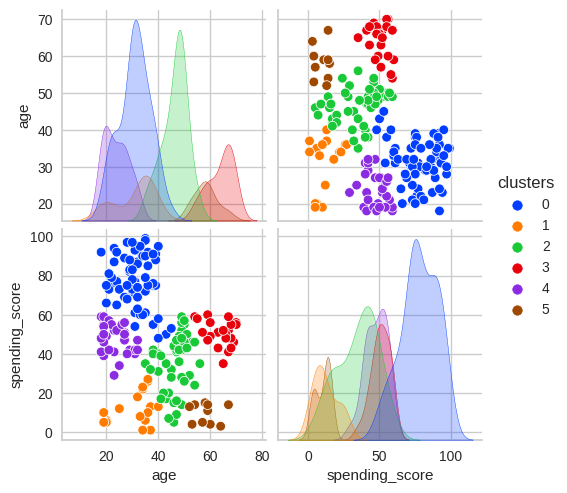

In [96]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X1, hue="clusters", palette="bright");

#### Annual Income and Spending Score- x2

<Figure size 2000x1000 with 0 Axes>

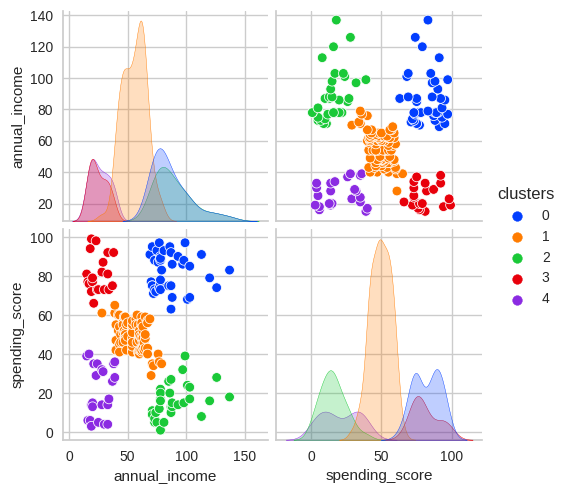

In [97]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X2, hue="clusters", palette="bright");

#### Interpretation based on Age and Spending Score- x1

In [134]:
X1.groupby('predicted_clusters')[['age', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('age', 'mean'), ascending=True)

age         spending_score        
                         mean min max           mean min max
predicted_clusters                                          
0                   25.500000  18  40      42.261905   5  59
2                   30.292308  18  40      79.815385  58  99
3                   45.276596  32  64      18.191489   1  40
1                   56.565217  43  70      48.304348  14  60

Interpreation (Labeling)

- 0 : Older medium spenders

- 1 : Mid-aged-to-older low spenders

- 2 : Young-to-mid-aged high spenders

- 3 : Younger low spenders

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [157]:
X2.groupby('predicted_clusters')[['annual_income', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('annual_income', 'mean'), ascending=True)

annual_income          spending_score        
                            mean min  max           mean min max
predicted_clusters                                              
3                      25.727273  15   39      79.363636  61  99
2                      26.304348  15   39      20.913043   3  40
0                      55.296296  39   76      49.518519  34  61
4                      86.538462  69  137      82.128205  63  97
1                      88.200000  70  137      17.114286   1  39

Interpretation (Labels)

0: Medium annual income - Medium spending score

1: High annual income - Low spending score

2: Low annual income - Low spending score

3: Low annual income - High spending score

4: High annual income - High spending score



## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___